# Notebook 5: Training Policies

Now comes the exciting part - **learning**! In this notebook, we'll train policies to balance the pendulum automatically, without manually specifying the weights.

## What You'll Learn

1. The training objective
2. Random search (simplest learning)
3. Hill climbing
4. Evolution strategies
5. Comparing algorithms

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.environments import InvertedPendulumEnv
from src.policies import LinearPolicy, NeuralNetworkPolicy
from src.utils import train_policy, evaluate_policy, plot_training_progress

## 1. The Training Objective

Our goal is to find policy parameters $\theta$ that maximize expected return:

$$\theta^* = \arg\max_\theta \mathbb{E}\left[ \sum_{t=0}^{T} r_t \right]$$

In simpler terms:
- Run the policy in the environment
- Calculate total reward
- Adjust parameters to get higher reward
- Repeat!

### Key Challenges
- We don't have gradients (unlike supervised learning)
- Rewards are noisy (stochastic environment)
- Credit assignment: which actions led to good outcomes?

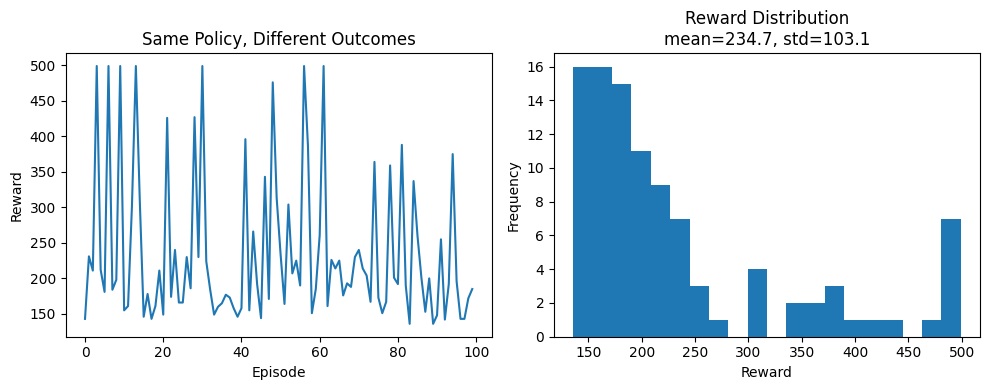

Key insight: Even the same policy gives different rewards each episode!
This is why we average over multiple episodes when evaluating.


In [2]:
# Let's see how noisy the reward signal is
env = InvertedPendulumEnv()
policy = LinearPolicy(weights=np.array([0, 0, 10, 3]))

rewards = []
for i in range(100):
    result = evaluate_policy(env, policy, n_episodes=1)
    rewards.append(result['mean_reward'])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Same Policy, Different Outcomes')

plt.subplot(1, 2, 2)
plt.hist(rewards, bins=20)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title(f'Reward Distribution\nmean={np.mean(rewards):.1f}, std={np.std(rewards):.1f}')

plt.tight_layout()
plt.show()

print("Key insight: Even the same policy gives different rewards each episode!")
print("This is why we average over multiple episodes when evaluating.")

## 2. Random Search

The simplest possible learning algorithm:

1. Generate random parameters
2. Evaluate performance
3. Keep the best
4. Repeat

It's surprisingly effective for low-dimensional problems!

In [3]:
# Train with random search
env = InvertedPendulumEnv()
policy = LinearPolicy()  # Start with zeros

print("Training with Random Search...")
print(f"Initial weights: {policy.get_flat_params()}\n")

result = train_policy(
    env, policy,
    algorithm='random_search',
    n_iterations=100,
    noise_scale=2.0,  # Range of random values
    n_episodes_per_eval=5,
    verbose=True
)

print(f"\nBest reward: {result['best_reward']:.1f}")
print(f"Best weights: {result['best_params']}")

Training with Random Search...
Initial weights: [0. 0. 0. 0. 0.]



Random Search:   0%|          | 0/100 [00:00<?, ?it/s]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=17.0]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:   0%|          | 0/100 [00:00<?, ?it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=41.2]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=48.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=48.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  19%|█▉        | 19/100 [00:00<00:00, 187.39it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  39%|███▉      | 39/100 [00:00<00:00, 193.48it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  62%|██████▏   | 62/100 [00:00<00:00, 206.12it/s, best=64.4]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=64.4]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=64.4]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=64.4]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=64.4]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=64.4]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search:  85%|████████▌ | 85/100 [00:00<00:00, 213.33it/s, best=71.2]

Random Search: 100%|██████████| 100/100 [00:00<00:00, 203.87it/s, best=71.2]


Best reward: 71.2
Best weights: [-1.79308707  0.56209215  0.70746323  4.39553923  0.61482698]


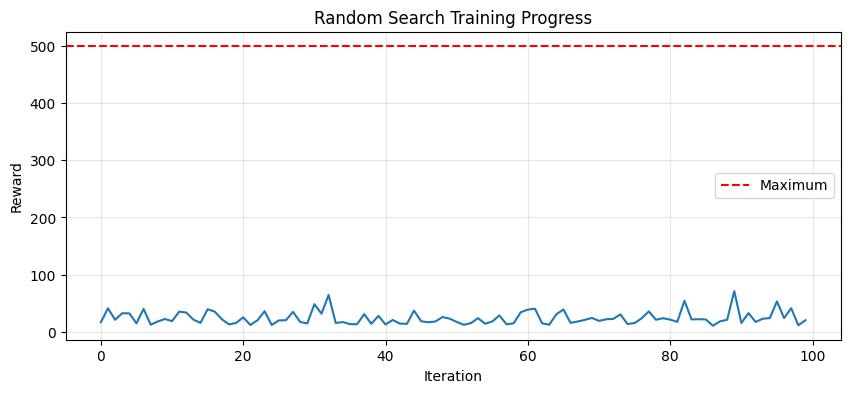

In [4]:
# Plot training progress
plt.figure(figsize=(10, 4))
plt.plot(result['reward_history'])
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Random Search Training Progress')
plt.axhline(y=500, color='r', linestyle='--', label='Maximum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# Evaluate the trained policy
eval_result = evaluate_policy(env, policy, n_episodes=50, verbose=True)

print(f"\nTrained Policy Performance:")
print(f"  Mean reward: {eval_result['mean_reward']:.1f} ± {eval_result['std_reward']:.1f}")

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 50/50 [00:00<00:00, 1051.59it/s]


Trained Policy Performance:
  Mean reward: 55.2 ± 27.2


## 3. Hill Climbing

A slightly smarter approach:

1. Start with current parameters
2. Add small random perturbation
3. If better, keep new parameters
4. Repeat

This is like walking uphill in the dark - only take steps that go up!

In [6]:
# Train with hill climbing
env = InvertedPendulumEnv()
policy = LinearPolicy()

print("Training with Hill Climbing...\n")

result_hc = train_policy(
    env, policy,
    algorithm='hill_climbing',
    n_iterations=200,
    noise_scale=0.5,  # Perturbation size
    n_episodes_per_eval=5,
    verbose=True
)

print(f"\nBest reward: {result_hc['best_reward']:.1f}")
print(f"Best weights: {result_hc['best_params']}")

Training with Hill Climbing...



Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=44.4]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=44.4]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=44.4]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=44.4]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=44.4]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   0%|          | 0/200 [00:00<?, ?it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:   8%|▊         | 17/200 [00:00<00:01, 164.09it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  18%|█▊        | 35/200 [00:00<00:00, 169.94it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  27%|██▋       | 54/200 [00:00<00:00, 178.77it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=50.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  36%|███▌      | 72/200 [00:00<00:00, 175.14it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  45%|████▌     | 90/200 [00:00<00:00, 175.18it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=53.2]

Hill Climbing:  54%|█████▍    | 108/200 [00:00<00:00, 174.94it/s, best=57.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=57.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=57.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=57.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=57.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  64%|██████▎   | 127/200 [00:00<00:00, 178.38it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  72%|███████▎  | 145/200 [00:00<00:00, 174.76it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:00<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  82%|████████▏ | 163/200 [00:01<00:00, 168.21it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=59.4]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=63.8]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=63.8]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=63.8]

Hill Climbing:  90%|█████████ | 180/200 [00:01<00:00, 164.41it/s, best=63.8]

Hill Climbing:  98%|█████████▊| 197/200 [00:01<00:00, 165.95it/s, best=63.8]

Hill Climbing:  98%|█████████▊| 197/200 [00:01<00:00, 165.95it/s, best=63.8]

Hill Climbing:  98%|█████████▊| 197/200 [00:01<00:00, 165.95it/s, best=63.8]

Hill Climbing:  98%|█████████▊| 197/200 [00:01<00:00, 165.95it/s, best=63.8]

Hill Climbing: 100%|██████████| 200/200 [00:01<00:00, 170.21it/s, best=63.8]


Best reward: 63.8
Best weights: [ 1.08186431  0.52555777 -0.6112934   0.97726625  0.38896444]


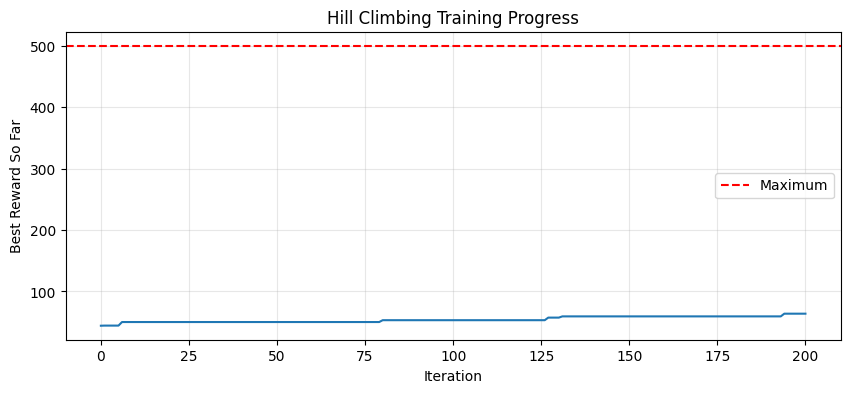

Notice: Progress is monotonic (never goes down)!
But it can get stuck in local optima.


In [7]:
# Plot hill climbing progress
plt.figure(figsize=(10, 4))
plt.plot(result_hc['reward_history'])
plt.xlabel('Iteration')
plt.ylabel('Best Reward So Far')
plt.title('Hill Climbing Training Progress')
plt.axhline(y=500, color='r', linestyle='--', label='Maximum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Notice: Progress is monotonic (never goes down)!")
print("But it can get stuck in local optima.")

## 4. Evolution Strategies

A more sophisticated approach inspired by natural evolution:

1. Create a population of perturbed parameters
2. Evaluate fitness of each
3. Move toward the best performers (weighted average)
4. Repeat

This is more robust and can escape local optima!

In [8]:
# Train with evolution strategies
env = InvertedPendulumEnv()
policy = LinearPolicy()

print("Training with Evolution Strategies...\n")

result_es = train_policy(
    env, policy,
    algorithm='evolutionary',
    n_iterations=50,
    population_size=20,  # Number of variants to try
    elite_frac=0.2,  # Keep top 20%
    noise_scale=0.5,
    n_episodes_per_eval=5,
    verbose=True
)

print(f"\nBest reward: {result_es['best_reward']:.1f}")
print(f"Best weights: {result_es['best_params']}")

Training with Evolution Strategies...



Training:   0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/50 [00:00<?, ?it/s, mean=47.0, best=54.2]

Training:   0%|          | 0/50 [00:00<?, ?it/s, mean=46.7, best=54.2]

Training:   4%|▍         | 2/50 [00:00<00:03, 14.84it/s, mean=46.7, best=54.2]

Training:   4%|▍         | 2/50 [00:00<00:03, 14.84it/s, mean=42.4, best=54.2]

Training:   4%|▍         | 2/50 [00:00<00:03, 14.84it/s, mean=47.5, best=54.6]

Training:   8%|▊         | 4/50 [00:00<00:02, 15.90it/s, mean=47.5, best=54.6]

Training:   8%|▊         | 4/50 [00:00<00:02, 15.90it/s, mean=43.5, best=54.6]

Training:   8%|▊         | 4/50 [00:00<00:02, 15.90it/s, mean=43.2, best=54.6]

Training:  12%|█▏        | 6/50 [00:00<00:02, 16.35it/s, mean=43.2, best=54.6]

Training:  12%|█▏        | 6/50 [00:00<00:02, 16.35it/s, mean=45.0, best=54.6]

Training:  12%|█▏        | 6/50 [00:00<00:02, 16.35it/s, mean=46.0, best=54.6]

Training:  16%|█▌        | 8/50 [00:00<00:02, 16.44it/s, mean=46.0, best=54.6]

Training:  16%|█▌        | 8/50 [00:00<00:02, 16.44it/s, mean=46.8, best=54.6]

Training:  16%|█▌        | 8/50 [00:00<00:02, 16.44it/s, mean=55.0, best=63.8]

Training:  20%|██        | 10/50 [00:00<00:02, 16.05it/s, mean=55.0, best=63.8]

Training:  20%|██        | 10/50 [00:00<00:02, 16.05it/s, mean=49.3, best=63.8]

Training:  20%|██        | 10/50 [00:00<00:02, 16.05it/s, mean=49.6, best=63.8]

Training:  24%|██▍       | 12/50 [00:00<00:02, 16.32it/s, mean=49.6, best=63.8]

Training:  24%|██▍       | 12/50 [00:00<00:02, 16.32it/s, mean=54.2, best=63.8]

Training:  24%|██▍       | 12/50 [00:00<00:02, 16.32it/s, mean=49.3, best=63.8]

Training:  28%|██▊       | 14/50 [00:00<00:02, 16.23it/s, mean=49.3, best=63.8]

Training:  28%|██▊       | 14/50 [00:00<00:02, 16.23it/s, mean=50.5, best=63.8]

Training:  28%|██▊       | 14/50 [00:00<00:02, 16.23it/s, mean=50.0, best=63.8]

Training:  32%|███▏      | 16/50 [00:00<00:02, 15.83it/s, mean=50.0, best=63.8]

Training:  32%|███▏      | 16/50 [00:01<00:02, 15.83it/s, mean=45.4, best=63.8]

Training:  32%|███▏      | 16/50 [00:01<00:02, 15.83it/s, mean=58.5, best=78.0]

Training:  36%|███▌      | 18/50 [00:01<00:02, 15.93it/s, mean=58.5, best=78.0]

Training:  36%|███▌      | 18/50 [00:01<00:02, 15.93it/s, mean=48.1, best=78.0]

Training:  36%|███▌      | 18/50 [00:01<00:02, 15.93it/s, mean=47.9, best=78.0]

Training:  40%|████      | 20/50 [00:01<00:01, 15.73it/s, mean=47.9, best=78.0]

Training:  40%|████      | 20/50 [00:01<00:01, 15.73it/s, mean=46.8, best=78.0]

Training:  40%|████      | 20/50 [00:01<00:01, 15.73it/s, mean=49.5, best=78.0]

Training:  44%|████▍     | 22/50 [00:01<00:01, 15.63it/s, mean=49.5, best=78.0]

Training:  44%|████▍     | 22/50 [00:01<00:01, 15.63it/s, mean=53.8, best=78.0]

Training:  44%|████▍     | 22/50 [00:01<00:01, 15.63it/s, mean=46.4, best=78.0]

Training:  48%|████▊     | 24/50 [00:01<00:01, 15.48it/s, mean=46.4, best=78.0]

Training:  48%|████▊     | 24/50 [00:01<00:01, 15.48it/s, mean=54.9, best=78.0]

Training:  48%|████▊     | 24/50 [00:01<00:01, 15.48it/s, mean=53.8, best=78.0]

Training:  52%|█████▏    | 26/50 [00:01<00:01, 15.45it/s, mean=53.8, best=78.0]

Training:  52%|█████▏    | 26/50 [00:01<00:01, 15.45it/s, mean=52.8, best=78.0]

Training:  52%|█████▏    | 26/50 [00:01<00:01, 15.45it/s, mean=48.1, best=78.0]

Training:  56%|█████▌    | 28/50 [00:01<00:01, 15.23it/s, mean=48.1, best=78.0]

Training:  56%|█████▌    | 28/50 [00:01<00:01, 15.23it/s, mean=57.2, best=78.0]

Training:  56%|█████▌    | 28/50 [00:01<00:01, 15.23it/s, mean=59.4, best=78.0]

Training:  60%|██████    | 30/50 [00:01<00:01, 15.11it/s, mean=59.4, best=78.0]

Training:  60%|██████    | 30/50 [00:01<00:01, 15.11it/s, mean=50.9, best=78.0]

Training:  60%|██████    | 30/50 [00:02<00:01, 15.11it/s, mean=57.9, best=78.0]

Training:  64%|██████▍   | 32/50 [00:02<00:01, 14.95it/s, mean=57.9, best=78.0]

Training:  64%|██████▍   | 32/50 [00:02<00:01, 14.95it/s, mean=57.5, best=78.0]

Training:  64%|██████▍   | 32/50 [00:02<00:01, 14.95it/s, mean=49.5, best=78.0]

Training:  68%|██████▊   | 34/50 [00:02<00:01, 15.09it/s, mean=49.5, best=78.0]

Training:  68%|██████▊   | 34/50 [00:02<00:01, 15.09it/s, mean=56.4, best=78.0]

Training:  68%|██████▊   | 34/50 [00:02<00:01, 15.09it/s, mean=52.0, best=78.0]

Training:  72%|███████▏  | 36/50 [00:02<00:00, 15.21it/s, mean=52.0, best=78.0]

Training:  72%|███████▏  | 36/50 [00:02<00:00, 15.21it/s, mean=46.0, best=78.0]

Training:  72%|███████▏  | 36/50 [00:02<00:00, 15.21it/s, mean=57.6, best=78.0]

Training:  76%|███████▌  | 38/50 [00:02<00:00, 15.45it/s, mean=57.6, best=78.0]

Training:  76%|███████▌  | 38/50 [00:02<00:00, 15.45it/s, mean=54.3, best=78.0]

Training:  76%|███████▌  | 38/50 [00:02<00:00, 15.45it/s, mean=51.9, best=78.0]

Training:  80%|████████  | 40/50 [00:02<00:00, 15.12it/s, mean=51.9, best=78.0]

Training:  80%|████████  | 40/50 [00:02<00:00, 15.12it/s, mean=50.1, best=78.0]

Training:  80%|████████  | 40/50 [00:02<00:00, 15.12it/s, mean=52.0, best=78.0]

Training:  84%|████████▍ | 42/50 [00:02<00:00, 15.31it/s, mean=52.0, best=78.0]

Training:  84%|████████▍ | 42/50 [00:02<00:00, 15.31it/s, mean=47.4, best=78.0]

Training:  84%|████████▍ | 42/50 [00:02<00:00, 15.31it/s, mean=48.0, best=78.0]

Training:  88%|████████▊ | 44/50 [00:02<00:00, 15.52it/s, mean=48.0, best=78.0]

Training:  88%|████████▊ | 44/50 [00:02<00:00, 15.52it/s, mean=49.7, best=78.0]

Training:  88%|████████▊ | 44/50 [00:02<00:00, 15.52it/s, mean=44.2, best=78.0]

Training:  92%|█████████▏| 46/50 [00:02<00:00, 15.97it/s, mean=44.2, best=78.0]

Training:  92%|█████████▏| 46/50 [00:02<00:00, 15.97it/s, mean=42.9, best=78.0]

Training:  92%|█████████▏| 46/50 [00:03<00:00, 15.97it/s, mean=53.9, best=78.0]

Training:  96%|█████████▌| 48/50 [00:03<00:00, 16.50it/s, mean=53.9, best=78.0]

Training:  96%|█████████▌| 48/50 [00:03<00:00, 16.50it/s, mean=50.4, best=78.0]

Training:  96%|█████████▌| 48/50 [00:03<00:00, 16.50it/s, mean=44.4, best=78.0]

Training: 100%|██████████| 50/50 [00:03<00:00, 16.60it/s, mean=44.4, best=78.0]

Training: 100%|██████████| 50/50 [00:03<00:00, 15.75it/s, mean=44.4, best=78.0]


Best reward: 78.0
Best weights: [ 0.4776702   0.01054233  0.18182794  1.15232246 -0.09264998]


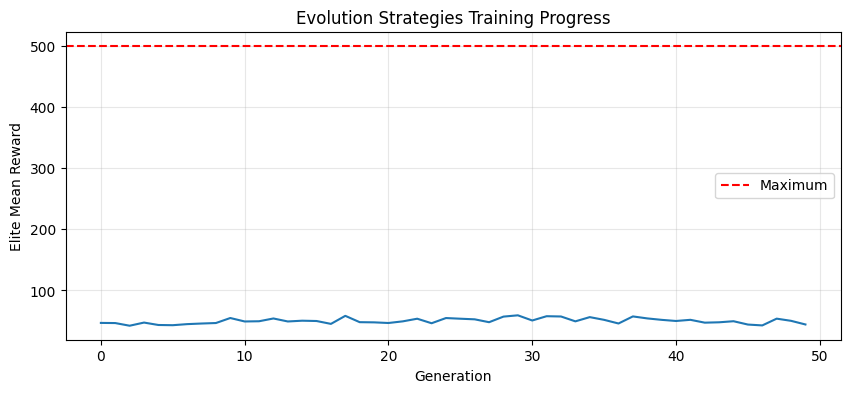

In [9]:
# Plot evolution strategies progress
plt.figure(figsize=(10, 4))
plt.plot(result_es['reward_history'])
plt.xlabel('Generation')
plt.ylabel('Elite Mean Reward')
plt.title('Evolution Strategies Training Progress')
plt.axhline(y=500, color='r', linestyle='--', label='Maximum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Comparing Algorithms

Let's run all three algorithms multiple times and compare!

In [10]:
# Run each algorithm multiple times
n_runs = 5
n_iterations = 100

algorithms = ['random_search', 'hill_climbing', 'evolutionary']
all_results = {alg: [] for alg in algorithms}

print(f"Running each algorithm {n_runs} times...\n")

for alg in algorithms:
    print(f"\n{alg}:")
    for run in range(n_runs):
        env = InvertedPendulumEnv()
        policy = LinearPolicy()
        
        result = train_policy(
            env, policy,
            algorithm=alg,
            n_iterations=n_iterations,
            population_size=15,
            noise_scale=0.5,
            n_episodes_per_eval=3,
            verbose=False,
            seed=run
        )
        
        # Evaluate final policy
        eval_result = evaluate_policy(env, policy, n_episodes=20)
        all_results[alg].append(eval_result['mean_reward'])
        print(f"  Run {run+1}: {eval_result['mean_reward']:.1f}")

Running each algorithm 5 times...


random_search:


  Run 1: 47.9


  Run 2: 38.2


  Run 3: 39.5


  Run 4: 45.0


  Run 5: 41.7

hill_climbing:


  Run 1: 45.0


  Run 2: 37.4


  Run 3: 45.1


  Run 4: 48.7
  Run 5: 50.3

evolutionary:


  Run 1: 93.1


  Run 2: 68.5


  Run 3: 42.2


  Run 4: 176.0


  Run 5: 44.3


/tmp/ipykernel_1364/1099698896.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data, labels=['Random', 'Hill Climb', 'Evolution'])


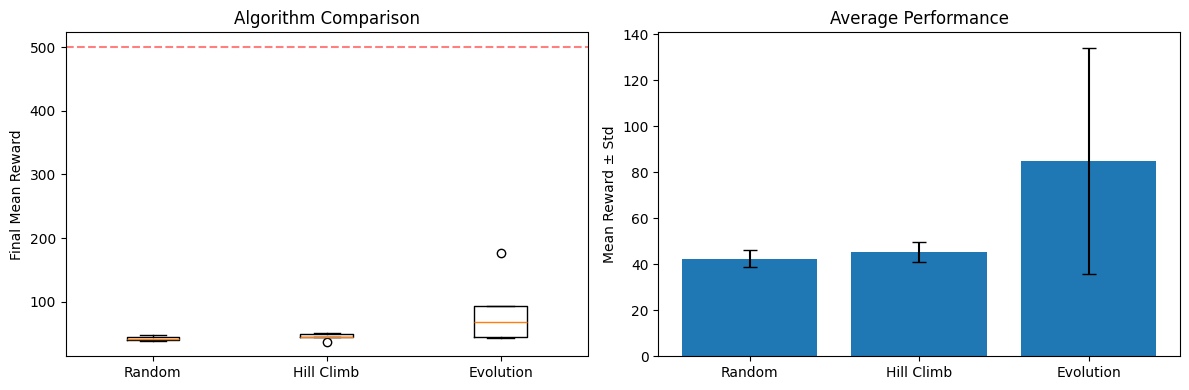


Summary:
  random_search  : 42.5 ± 3.6
  hill_climbing  : 45.3 ± 4.5
  evolutionary   : 84.8 ± 49.2


In [11]:
# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Box plot
data = [all_results[alg] for alg in algorithms]
ax1.boxplot(data, labels=['Random', 'Hill Climb', 'Evolution'])
ax1.set_ylabel('Final Mean Reward')
ax1.set_title('Algorithm Comparison')
ax1.axhline(y=500, color='r', linestyle='--', alpha=0.5)

# Bar plot with error bars
means = [np.mean(all_results[alg]) for alg in algorithms]
stds = [np.std(all_results[alg]) for alg in algorithms]
x = range(len(algorithms))
ax2.bar(x, means, yerr=stds, capsize=5)
ax2.set_xticks(x)
ax2.set_xticklabels(['Random', 'Hill Climb', 'Evolution'])
ax2.set_ylabel('Mean Reward ± Std')
ax2.set_title('Average Performance')

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary:")
for alg in algorithms:
    rewards = all_results[alg]
    print(f"  {alg:15s}: {np.mean(rewards):.1f} ± {np.std(rewards):.1f}")

## 6. Training a Neural Network Policy

Can we train a neural network with these same algorithms?

In [12]:
# Train a neural network with evolution strategies
env = InvertedPendulumEnv()
nn_policy = NeuralNetworkPolicy(hidden_sizes=[16, 16])  # Smaller network

print(f"Neural network has {nn_policy.get_num_params()} parameters")
print("(vs 5 for linear policy)\n")

print("Training neural network with Evolution Strategies...\n")

result_nn = train_policy(
    env, nn_policy,
    algorithm='evolutionary',
    n_iterations=100,
    population_size=30,
    noise_scale=0.3,
    n_episodes_per_eval=3,
    verbose=True
)

print(f"\nBest reward: {result_nn['best_reward']:.1f}")

Neural network has 369 parameters
(vs 5 for linear policy)

Training neural network with Evolution Strategies...



Training:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/100 [00:00<?, ?it/s, mean=28.1, best=37.7]

Training:   1%|          | 1/100 [00:00<00:15,  6.19it/s, mean=28.1, best=37.7]

Training:   1%|          | 1/100 [00:00<00:15,  6.19it/s, mean=37.3, best=77.7]

Training:   2%|▏         | 2/100 [00:00<00:15,  6.15it/s, mean=37.3, best=77.7]

Training:   2%|▏         | 2/100 [00:00<00:15,  6.15it/s, mean=47.7, best=77.7]

Training:   3%|▎         | 3/100 [00:00<00:17,  5.50it/s, mean=47.7, best=77.7]

Training:   3%|▎         | 3/100 [00:00<00:17,  5.50it/s, mean=34.7, best=77.7]

Training:   4%|▍         | 4/100 [00:00<00:17,  5.62it/s, mean=34.7, best=77.7]

Training:   4%|▍         | 4/100 [00:00<00:17,  5.62it/s, mean=35.1, best=77.7]

Training:   5%|▌         | 5/100 [00:00<00:17,  5.58it/s, mean=35.1, best=77.7]

Training:   5%|▌         | 5/100 [00:01<00:17,  5.58it/s, mean=33.4, best=77.7]

Training:   6%|▌         | 6/100 [00:01<00:16,  5.65it/s, mean=33.4, best=77.7]

Training:   6%|▌         | 6/100 [00:01<00:16,  5.65it/s, mean=26.3, best=77.7]

Training:   7%|▋         | 7/100 [00:01<00:15,  5.89it/s, mean=26.3, best=77.7]

Training:   7%|▋         | 7/100 [00:01<00:15,  5.89it/s, mean=32.2, best=77.7]

Training:   8%|▊         | 8/100 [00:01<00:15,  6.03it/s, mean=32.2, best=77.7]

Training:   8%|▊         | 8/100 [00:01<00:15,  6.03it/s, mean=37.2, best=77.7]

Training:   9%|▉         | 9/100 [00:01<00:15,  5.87it/s, mean=37.2, best=77.7]

Training:   9%|▉         | 9/100 [00:01<00:15,  5.87it/s, mean=32.2, best=77.7]

Training:  10%|█         | 10/100 [00:01<00:15,  5.93it/s, mean=32.2, best=77.7]

Training:  10%|█         | 10/100 [00:01<00:15,  5.93it/s, mean=46.1, best=112.7]

Training:  11%|█         | 11/100 [00:01<00:15,  5.63it/s, mean=46.1, best=112.7]

Training:  11%|█         | 11/100 [00:02<00:15,  5.63it/s, mean=44.2, best=112.7]

Training:  12%|█▏        | 12/100 [00:02<00:16,  5.48it/s, mean=44.2, best=112.7]

Training:  12%|█▏        | 12/100 [00:02<00:16,  5.48it/s, mean=34.8, best=112.7]

Training:  13%|█▎        | 13/100 [00:02<00:15,  5.56it/s, mean=34.8, best=112.7]

Training:  13%|█▎        | 13/100 [00:02<00:15,  5.56it/s, mean=43.7, best=112.7]

Training:  14%|█▍        | 14/100 [00:02<00:15,  5.53it/s, mean=43.7, best=112.7]

Training:  14%|█▍        | 14/100 [00:02<00:15,  5.53it/s, mean=41.8, best=112.7]

Training:  15%|█▌        | 15/100 [00:02<00:15,  5.44it/s, mean=41.8, best=112.7]

Training:  15%|█▌        | 15/100 [00:02<00:15,  5.44it/s, mean=46.3, best=112.7]

Training:  16%|█▌        | 16/100 [00:02<00:16,  5.20it/s, mean=46.3, best=112.7]

Training:  16%|█▌        | 16/100 [00:03<00:16,  5.20it/s, mean=30.7, best=112.7]

Training:  17%|█▋        | 17/100 [00:03<00:15,  5.47it/s, mean=30.7, best=112.7]

Training:  17%|█▋        | 17/100 [00:03<00:15,  5.47it/s, mean=39.4, best=112.7]

Training:  18%|█▊        | 18/100 [00:03<00:14,  5.59it/s, mean=39.4, best=112.7]

Training:  18%|█▊        | 18/100 [00:03<00:14,  5.59it/s, mean=45.4, best=112.7]

Training:  19%|█▉        | 19/100 [00:03<00:14,  5.47it/s, mean=45.4, best=112.7]

Training:  19%|█▉        | 19/100 [00:03<00:14,  5.47it/s, mean=34.4, best=112.7]

Training:  20%|██        | 20/100 [00:03<00:14,  5.52it/s, mean=34.4, best=112.7]

Training:  20%|██        | 20/100 [00:03<00:14,  5.52it/s, mean=29.6, best=112.7]

Training:  21%|██        | 21/100 [00:03<00:14,  5.50it/s, mean=29.6, best=112.7]

Training:  21%|██        | 21/100 [00:03<00:14,  5.50it/s, mean=30.2, best=112.7]

Training:  22%|██▏       | 22/100 [00:03<00:13,  5.74it/s, mean=30.2, best=112.7]

Training:  22%|██▏       | 22/100 [00:04<00:13,  5.74it/s, mean=35.9, best=112.7]

Training:  23%|██▎       | 23/100 [00:04<00:13,  5.67it/s, mean=35.9, best=112.7]

Training:  23%|██▎       | 23/100 [00:04<00:13,  5.67it/s, mean=39.3, best=112.7]

Training:  24%|██▍       | 24/100 [00:04<00:13,  5.54it/s, mean=39.3, best=112.7]

Training:  24%|██▍       | 24/100 [00:04<00:13,  5.54it/s, mean=31.0, best=112.7]

Training:  25%|██▌       | 25/100 [00:04<00:12,  5.85it/s, mean=31.0, best=112.7]

Training:  25%|██▌       | 25/100 [00:04<00:12,  5.85it/s, mean=27.0, best=112.7]

Training:  26%|██▌       | 26/100 [00:04<00:12,  6.04it/s, mean=27.0, best=112.7]

Training:  26%|██▌       | 26/100 [00:04<00:12,  6.04it/s, mean=40.9, best=112.7]

Training:  27%|██▋       | 27/100 [00:04<00:13,  5.27it/s, mean=40.9, best=112.7]

Training:  27%|██▋       | 27/100 [00:04<00:13,  5.27it/s, mean=38.7, best=112.7]

Training:  28%|██▊       | 28/100 [00:04<00:13,  5.47it/s, mean=38.7, best=112.7]

Training:  28%|██▊       | 28/100 [00:05<00:13,  5.47it/s, mean=24.8, best=112.7]

Training:  29%|██▉       | 29/100 [00:05<00:12,  5.89it/s, mean=24.8, best=112.7]

Training:  29%|██▉       | 29/100 [00:05<00:12,  5.89it/s, mean=44.3, best=112.7]

Training:  30%|███       | 30/100 [00:05<00:12,  5.67it/s, mean=44.3, best=112.7]

Training:  30%|███       | 30/100 [00:05<00:12,  5.67it/s, mean=45.9, best=112.7]

Training:  31%|███       | 31/100 [00:05<00:13,  5.30it/s, mean=45.9, best=112.7]

Training:  31%|███       | 31/100 [00:05<00:13,  5.30it/s, mean=43.2, best=112.7]

Training:  32%|███▏      | 32/100 [00:05<00:12,  5.41it/s, mean=43.2, best=112.7]

Training:  32%|███▏      | 32/100 [00:05<00:12,  5.41it/s, mean=26.9, best=112.7]

Training:  33%|███▎      | 33/100 [00:05<00:11,  5.87it/s, mean=26.9, best=112.7]

Training:  33%|███▎      | 33/100 [00:06<00:11,  5.87it/s, mean=32.6, best=112.7]

Training:  34%|███▍      | 34/100 [00:06<00:11,  5.89it/s, mean=32.6, best=112.7]

Training:  34%|███▍      | 34/100 [00:06<00:11,  5.89it/s, mean=32.4, best=112.7]

Training:  35%|███▌      | 35/100 [00:06<00:10,  5.95it/s, mean=32.4, best=112.7]

Training:  35%|███▌      | 35/100 [00:06<00:10,  5.95it/s, mean=36.5, best=112.7]

Training:  36%|███▌      | 36/100 [00:06<00:10,  6.15it/s, mean=36.5, best=112.7]

Training:  36%|███▌      | 36/100 [00:06<00:10,  6.15it/s, mean=26.8, best=112.7]

Training:  37%|███▋      | 37/100 [00:06<00:09,  6.31it/s, mean=26.8, best=112.7]

Training:  37%|███▋      | 37/100 [00:06<00:09,  6.31it/s, mean=24.9, best=112.7]

Training:  38%|███▊      | 38/100 [00:06<00:09,  6.50it/s, mean=24.9, best=112.7]

Training:  38%|███▊      | 38/100 [00:06<00:09,  6.50it/s, mean=39.3, best=112.7]

Training:  39%|███▉      | 39/100 [00:06<00:09,  6.34it/s, mean=39.3, best=112.7]

Training:  39%|███▉      | 39/100 [00:06<00:09,  6.34it/s, mean=44.8, best=112.7]

Training:  40%|████      | 40/100 [00:06<00:10,  5.81it/s, mean=44.8, best=112.7]

Training:  40%|████      | 40/100 [00:07<00:10,  5.81it/s, mean=50.0, best=112.7]

Training:  41%|████      | 41/100 [00:07<00:10,  5.57it/s, mean=50.0, best=112.7]

Training:  41%|████      | 41/100 [00:07<00:10,  5.57it/s, mean=28.7, best=112.7]

Training:  42%|████▏     | 42/100 [00:07<00:10,  5.35it/s, mean=28.7, best=112.7]

Training:  42%|████▏     | 42/100 [00:07<00:10,  5.35it/s, mean=37.4, best=112.7]

Training:  43%|████▎     | 43/100 [00:07<00:10,  5.55it/s, mean=37.4, best=112.7]

Training:  43%|████▎     | 43/100 [00:07<00:10,  5.55it/s, mean=68.5, best=118.3]

Training:  44%|████▍     | 44/100 [00:07<00:10,  5.14it/s, mean=68.5, best=118.3]

Training:  44%|████▍     | 44/100 [00:07<00:10,  5.14it/s, mean=43.2, best=118.3]

Training:  45%|████▌     | 45/100 [00:07<00:10,  5.39it/s, mean=43.2, best=118.3]

Training:  45%|████▌     | 45/100 [00:08<00:10,  5.39it/s, mean=44.5, best=118.3]

Training:  46%|████▌     | 46/100 [00:08<00:09,  5.50it/s, mean=44.5, best=118.3]

Training:  46%|████▌     | 46/100 [00:08<00:09,  5.50it/s, mean=31.7, best=118.3]

Training:  47%|████▋     | 47/100 [00:08<00:09,  5.70it/s, mean=31.7, best=118.3]

Training:  47%|████▋     | 47/100 [00:08<00:09,  5.70it/s, mean=34.8, best=118.3]

Training:  48%|████▊     | 48/100 [00:08<00:08,  5.79it/s, mean=34.8, best=118.3]

Training:  48%|████▊     | 48/100 [00:08<00:08,  5.79it/s, mean=66.6, best=118.3]

Training:  49%|████▉     | 49/100 [00:08<00:09,  5.29it/s, mean=66.6, best=118.3]

Training:  49%|████▉     | 49/100 [00:08<00:09,  5.29it/s, mean=25.7, best=118.3]

Training:  50%|█████     | 50/100 [00:08<00:08,  5.77it/s, mean=25.7, best=118.3]

Training:  50%|█████     | 50/100 [00:09<00:08,  5.77it/s, mean=52.8, best=118.3]

Training:  51%|█████     | 51/100 [00:09<00:08,  5.57it/s, mean=52.8, best=118.3]

Training:  51%|█████     | 51/100 [00:09<00:08,  5.57it/s, mean=68.7, best=165.3]

Training:  52%|█████▏    | 52/100 [00:09<00:09,  4.97it/s, mean=68.7, best=165.3]

Training:  52%|█████▏    | 52/100 [00:09<00:09,  4.97it/s, mean=45.0, best=165.3]

Training:  53%|█████▎    | 53/100 [00:09<00:09,  5.10it/s, mean=45.0, best=165.3]

Training:  53%|█████▎    | 53/100 [00:09<00:09,  5.10it/s, mean=38.7, best=165.3]

Training:  54%|█████▍    | 54/100 [00:09<00:08,  5.26it/s, mean=38.7, best=165.3]

Training:  54%|█████▍    | 54/100 [00:09<00:08,  5.26it/s, mean=72.8, best=165.3]

Training:  55%|█████▌    | 55/100 [00:09<00:09,  4.73it/s, mean=72.8, best=165.3]

Training:  55%|█████▌    | 55/100 [00:10<00:09,  4.73it/s, mean=102.3, best=197.7]

Training:  56%|█████▌    | 56/100 [00:10<00:10,  4.12it/s, mean=102.3, best=197.7]

Training:  56%|█████▌    | 56/100 [00:10<00:10,  4.12it/s, mean=51.2, best=197.7] 

Training:  57%|█████▋    | 57/100 [00:10<00:09,  4.36it/s, mean=51.2, best=197.7]

Training:  57%|█████▋    | 57/100 [00:10<00:09,  4.36it/s, mean=36.4, best=197.7]

Training:  58%|█████▊    | 58/100 [00:10<00:08,  4.76it/s, mean=36.4, best=197.7]

Training:  58%|█████▊    | 58/100 [00:10<00:08,  4.76it/s, mean=30.9, best=197.7]

Training:  59%|█████▉    | 59/100 [00:10<00:07,  5.23it/s, mean=30.9, best=197.7]

Training:  59%|█████▉    | 59/100 [00:10<00:07,  5.23it/s, mean=42.7, best=197.7]

Training:  60%|██████    | 60/100 [00:10<00:07,  5.25it/s, mean=42.7, best=197.7]

Training:  60%|██████    | 60/100 [00:11<00:07,  5.25it/s, mean=46.5, best=197.7]

Training:  61%|██████    | 61/100 [00:11<00:07,  4.92it/s, mean=46.5, best=197.7]

Training:  61%|██████    | 61/100 [00:11<00:07,  4.92it/s, mean=46.2, best=197.7]

Training:  62%|██████▏   | 62/100 [00:11<00:07,  4.96it/s, mean=46.2, best=197.7]

Training:  62%|██████▏   | 62/100 [00:11<00:07,  4.96it/s, mean=73.5, best=197.7]

Training:  63%|██████▎   | 63/100 [00:11<00:07,  4.83it/s, mean=73.5, best=197.7]

Training:  63%|██████▎   | 63/100 [00:11<00:07,  4.83it/s, mean=61.2, best=197.7]

Training:  64%|██████▍   | 64/100 [00:11<00:07,  4.61it/s, mean=61.2, best=197.7]

Training:  64%|██████▍   | 64/100 [00:12<00:07,  4.61it/s, mean=81.3, best=197.7]

Training:  65%|██████▌   | 65/100 [00:12<00:08,  4.19it/s, mean=81.3, best=197.7]

Training:  65%|██████▌   | 65/100 [00:12<00:08,  4.19it/s, mean=59.7, best=197.7]

Training:  66%|██████▌   | 66/100 [00:12<00:07,  4.40it/s, mean=59.7, best=197.7]

Training:  66%|██████▌   | 66/100 [00:12<00:07,  4.40it/s, mean=81.4, best=197.7]

Training:  67%|██████▋   | 67/100 [00:12<00:07,  4.20it/s, mean=81.4, best=197.7]

Training:  67%|██████▋   | 67/100 [00:12<00:07,  4.20it/s, mean=103.1, best=250.0]

Training:  68%|██████▊   | 68/100 [00:12<00:08,  3.82it/s, mean=103.1, best=250.0]

Training:  68%|██████▊   | 68/100 [00:13<00:08,  3.82it/s, mean=109.0, best=250.0]

Training:  69%|██████▉   | 69/100 [00:13<00:08,  3.63it/s, mean=109.0, best=250.0]

Training:  69%|██████▉   | 69/100 [00:13<00:08,  3.63it/s, mean=88.4, best=250.0] 

Training:  70%|███████   | 70/100 [00:13<00:08,  3.57it/s, mean=88.4, best=250.0]

Training:  70%|███████   | 70/100 [00:13<00:08,  3.57it/s, mean=130.7, best=268.0]

Training:  71%|███████   | 71/100 [00:13<00:08,  3.24it/s, mean=130.7, best=268.0]

Training:  71%|███████   | 71/100 [00:14<00:08,  3.24it/s, mean=130.2, best=497.7]

Training:  72%|███████▏  | 72/100 [00:14<00:08,  3.15it/s, mean=130.2, best=497.7]

Training:  72%|███████▏  | 72/100 [00:14<00:08,  3.15it/s, mean=130.8, best=497.7]

Training:  73%|███████▎  | 73/100 [00:14<00:09,  2.80it/s, mean=130.8, best=497.7]

Training:  73%|███████▎  | 73/100 [00:15<00:09,  2.80it/s, mean=215.1, best=499.0]

Training:  74%|███████▍  | 74/100 [00:15<00:10,  2.43it/s, mean=215.1, best=499.0]

Training:  74%|███████▍  | 74/100 [00:15<00:10,  2.43it/s, mean=118.9, best=499.0]

Training:  75%|███████▌  | 75/100 [00:15<00:10,  2.45it/s, mean=118.9, best=499.0]

Training:  75%|███████▌  | 75/100 [00:16<00:10,  2.45it/s, mean=248.4, best=499.0]

Training:  76%|███████▌  | 76/100 [00:16<00:11,  2.10it/s, mean=248.4, best=499.0]

Training:  76%|███████▌  | 76/100 [00:16<00:11,  2.10it/s, mean=199.4, best=499.0]

Training:  77%|███████▋  | 77/100 [00:16<00:11,  2.08it/s, mean=199.4, best=499.0]

Training:  77%|███████▋  | 77/100 [00:17<00:11,  2.08it/s, mean=157.0, best=499.0]

Training:  78%|███████▊  | 78/100 [00:17<00:09,  2.21it/s, mean=157.0, best=499.0]

Training:  78%|███████▊  | 78/100 [00:17<00:09,  2.21it/s, mean=145.2, best=499.0]

Training:  79%|███████▉  | 79/100 [00:17<00:09,  2.24it/s, mean=145.2, best=499.0]

Training:  79%|███████▉  | 79/100 [00:17<00:09,  2.24it/s, mean=133.3, best=499.0]

Training:  80%|████████  | 80/100 [00:17<00:09,  2.19it/s, mean=133.3, best=499.0]

Training:  80%|████████  | 80/100 [00:18<00:09,  2.19it/s, mean=184.4, best=499.0]

Training:  81%|████████  | 81/100 [00:18<00:08,  2.18it/s, mean=184.4, best=499.0]

Training:  81%|████████  | 81/100 [00:18<00:08,  2.18it/s, mean=154.9, best=499.0]

Training:  82%|████████▏ | 82/100 [00:18<00:07,  2.27it/s, mean=154.9, best=499.0]

Training:  82%|████████▏ | 82/100 [00:19<00:07,  2.27it/s, mean=166.2, best=499.0]

Training:  83%|████████▎ | 83/100 [00:19<00:07,  2.30it/s, mean=166.2, best=499.0]

Training:  83%|████████▎ | 83/100 [00:19<00:07,  2.30it/s, mean=102.1, best=499.0]

Training:  84%|████████▍ | 84/100 [00:19<00:06,  2.39it/s, mean=102.1, best=499.0]

Training:  84%|████████▍ | 84/100 [00:20<00:06,  2.39it/s, mean=181.7, best=499.0]

Training:  85%|████████▌ | 85/100 [00:20<00:06,  2.25it/s, mean=181.7, best=499.0]

Training:  85%|████████▌ | 85/100 [00:20<00:06,  2.25it/s, mean=215.6, best=499.0]

Training:  86%|████████▌ | 86/100 [00:20<00:06,  2.15it/s, mean=215.6, best=499.0]

Training:  86%|████████▌ | 86/100 [00:21<00:06,  2.15it/s, mean=149.6, best=499.0]

Training:  87%|████████▋ | 87/100 [00:21<00:05,  2.20it/s, mean=149.6, best=499.0]

Training:  87%|████████▋ | 87/100 [00:21<00:05,  2.20it/s, mean=322.1, best=499.0]

Training:  88%|████████▊ | 88/100 [00:21<00:06,  1.93it/s, mean=322.1, best=499.0]

Training:  88%|████████▊ | 88/100 [00:22<00:06,  1.93it/s, mean=221.3, best=499.0]

Training:  89%|████████▉ | 89/100 [00:22<00:06,  1.82it/s, mean=221.3, best=499.0]

Training:  89%|████████▉ | 89/100 [00:23<00:06,  1.82it/s, mean=296.4, best=499.0]

Training:  90%|█████████ | 90/100 [00:23<00:05,  1.70it/s, mean=296.4, best=499.0]

Training:  90%|█████████ | 90/100 [00:23<00:05,  1.70it/s, mean=182.6, best=499.0]

Training:  91%|█████████ | 91/100 [00:23<00:04,  1.83it/s, mean=182.6, best=499.0]

Training:  91%|█████████ | 91/100 [00:24<00:04,  1.83it/s, mean=322.6, best=499.0]

Training:  92%|█████████▏| 92/100 [00:24<00:04,  1.70it/s, mean=322.6, best=499.0]

Training:  92%|█████████▏| 92/100 [00:24<00:04,  1.70it/s, mean=283.5, best=499.0]

Training:  93%|█████████▎| 93/100 [00:24<00:04,  1.63it/s, mean=283.5, best=499.0]

Training:  93%|█████████▎| 93/100 [00:25<00:04,  1.63it/s, mean=332.1, best=499.0]

Training:  94%|█████████▍| 94/100 [00:25<00:03,  1.56it/s, mean=332.1, best=499.0]

Training:  94%|█████████▍| 94/100 [00:26<00:03,  1.56it/s, mean=206.4, best=499.0]

Training:  95%|█████████▌| 95/100 [00:26<00:02,  1.68it/s, mean=206.4, best=499.0]

Training:  95%|█████████▌| 95/100 [00:26<00:02,  1.68it/s, mean=305.6, best=499.0]

Training:  96%|█████████▌| 96/100 [00:26<00:02,  1.59it/s, mean=305.6, best=499.0]

Training:  96%|█████████▌| 96/100 [00:27<00:02,  1.59it/s, mean=413.8, best=499.0]

Training:  97%|█████████▋| 97/100 [00:27<00:02,  1.41it/s, mean=413.8, best=499.0]

Training:  97%|█████████▋| 97/100 [00:28<00:02,  1.41it/s, mean=347.9, best=499.0]

Training:  98%|█████████▊| 98/100 [00:28<00:01,  1.31it/s, mean=347.9, best=499.0]

Training:  98%|█████████▊| 98/100 [00:29<00:01,  1.31it/s, mean=349.3, best=499.0]

Training:  99%|█████████▉| 99/100 [00:29<00:00,  1.30it/s, mean=349.3, best=499.0]

Training:  99%|█████████▉| 99/100 [00:30<00:00,  1.30it/s, mean=406.1, best=499.0]

Training: 100%|██████████| 100/100 [00:30<00:00,  1.15it/s, mean=406.1, best=499.0]

Training: 100%|██████████| 100/100 [00:30<00:00,  3.28it/s, mean=406.1, best=499.0]


Best reward: 499.0


In [13]:
# Evaluate trained neural network
eval_result = evaluate_policy(env, nn_policy, n_episodes=50)

print(f"Trained Neural Network Performance:")
print(f"  Mean reward: {eval_result['mean_reward']:.1f} ± {eval_result['std_reward']:.1f}")

Trained Neural Network Performance:
  Mean reward: 499.0 ± 0.0


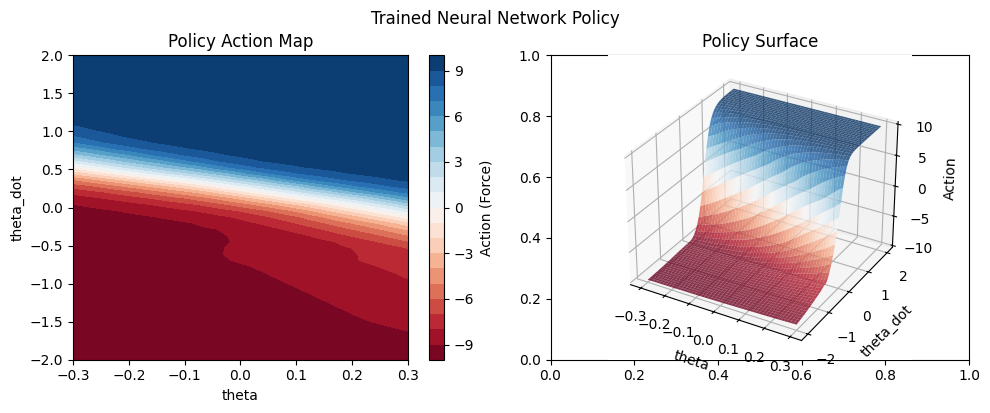

Notice: The trained network learned a sensible policy!
Positive theta -> positive action (push right)


In [14]:
# Visualize the trained neural network's policy surface
from src.utils.visualization import plot_policy_surface

fig = plot_policy_surface(
    nn_policy,
    state_ranges={'theta': (-0.3, 0.3), 'theta_dot': (-2, 2)},
    fixed_states={'x': 0, 'x_dot': 0}
)
plt.suptitle('Trained Neural Network Policy', y=1.02)
plt.show()

print("Notice: The trained network learned a sensible policy!")
print("Positive theta -> positive action (push right)")

## Exercises

### Exercise 1: Hyperparameter Tuning
Try different hyperparameters for evolution strategies (population size, elite fraction, noise scale). What works best?

### Exercise 2: Longer Training
Train for more iterations. Does performance keep improving? When does it plateau?

### Exercise 3: Harder Environment
Try training on a harder environment (shorter pole, less force). Can the algorithms still find good policies?

In [15]:
# Exercise 3: Train on harder environment
hard_env = InvertedPendulumEnv(
    pole_length=0.3,  # Shorter pole
    force_mag=8.0,    # Less force
    theta_threshold=0.15  # Stricter angle
)

policy = LinearPolicy()

print("Training on harder environment...\n")

result_hard = train_policy(
    hard_env, policy,
    algorithm='evolutionary',
    n_iterations=100,
    population_size=30,
    noise_scale=0.5,
    n_episodes_per_eval=5,
    verbose=True
)

# Evaluate
eval_result = evaluate_policy(hard_env, policy, n_episodes=50)
print(f"\nHard Environment Performance:")
print(f"  Mean reward: {eval_result['mean_reward']:.1f} ± {eval_result['std_reward']:.1f}")
print(f"  Max possible: {hard_env.max_steps}")

Training on harder environment...



Training:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/100 [00:00<?, ?it/s, mean=31.6, best=43.8]

Training:   0%|          | 0/100 [00:00<?, ?it/s, mean=34.2, best=43.8]

Training:   2%|▏         | 2/100 [00:00<00:05, 16.39it/s, mean=34.2, best=43.8]

Training:   2%|▏         | 2/100 [00:00<00:05, 16.39it/s, mean=33.3, best=43.8]

Training:   2%|▏         | 2/100 [00:00<00:05, 16.39it/s, mean=38.3, best=43.8]

Training:   4%|▍         | 4/100 [00:00<00:06, 15.49it/s, mean=38.3, best=43.8]

Training:   4%|▍         | 4/100 [00:00<00:06, 15.49it/s, mean=38.8, best=48.2]

Training:   4%|▍         | 4/100 [00:00<00:06, 15.49it/s, mean=36.3, best=48.2]

Training:   6%|▌         | 6/100 [00:00<00:06, 15.15it/s, mean=36.3, best=48.2]

Training:   6%|▌         | 6/100 [00:00<00:06, 15.15it/s, mean=38.7, best=56.2]

Training:   6%|▌         | 6/100 [00:00<00:06, 15.15it/s, mean=35.4, best=56.2]

Training:   8%|▊         | 8/100 [00:00<00:06, 15.01it/s, mean=35.4, best=56.2]

Training:   8%|▊         | 8/100 [00:00<00:06, 15.01it/s, mean=34.0, best=56.2]

Training:   8%|▊         | 8/100 [00:00<00:06, 15.01it/s, mean=32.7, best=56.2]

Training:  10%|█         | 10/100 [00:00<00:06, 14.78it/s, mean=32.7, best=56.2]

Training:  10%|█         | 10/100 [00:00<00:06, 14.78it/s, mean=32.0, best=56.2]

Training:  10%|█         | 10/100 [00:00<00:06, 14.78it/s, mean=38.1, best=56.2]

Training:  12%|█▏        | 12/100 [00:00<00:05, 15.10it/s, mean=38.1, best=56.2]

Training:  12%|█▏        | 12/100 [00:00<00:05, 15.10it/s, mean=33.2, best=56.2]

Training:  12%|█▏        | 12/100 [00:00<00:05, 15.10it/s, mean=37.3, best=56.2]

Training:  14%|█▍        | 14/100 [00:00<00:05, 15.04it/s, mean=37.3, best=56.2]

Training:  14%|█▍        | 14/100 [00:00<00:05, 15.04it/s, mean=34.1, best=56.2]

Training:  14%|█▍        | 14/100 [00:01<00:05, 15.04it/s, mean=40.8, best=56.2]

Training:  16%|█▌        | 16/100 [00:01<00:05, 14.56it/s, mean=40.8, best=56.2]

Training:  16%|█▌        | 16/100 [00:01<00:05, 14.56it/s, mean=36.8, best=56.2]

Training:  16%|█▌        | 16/100 [00:01<00:05, 14.56it/s, mean=41.5, best=56.2]

Training:  18%|█▊        | 18/100 [00:01<00:05, 14.61it/s, mean=41.5, best=56.2]

Training:  18%|█▊        | 18/100 [00:01<00:05, 14.61it/s, mean=37.4, best=56.2]

Training:  18%|█▊        | 18/100 [00:01<00:05, 14.61it/s, mean=34.8, best=56.2]

Training:  20%|██        | 20/100 [00:01<00:05, 14.50it/s, mean=34.8, best=56.2]

Training:  20%|██        | 20/100 [00:01<00:05, 14.50it/s, mean=41.4, best=56.2]

Training:  20%|██        | 20/100 [00:01<00:05, 14.50it/s, mean=36.3, best=56.2]

Training:  22%|██▏       | 22/100 [00:01<00:05, 14.27it/s, mean=36.3, best=56.2]

Training:  22%|██▏       | 22/100 [00:01<00:05, 14.27it/s, mean=42.9, best=56.2]

Training:  22%|██▏       | 22/100 [00:01<00:05, 14.27it/s, mean=37.4, best=56.2]

Training:  24%|██▍       | 24/100 [00:01<00:05, 14.04it/s, mean=37.4, best=56.2]

Training:  24%|██▍       | 24/100 [00:01<00:05, 14.04it/s, mean=42.7, best=56.2]

Training:  24%|██▍       | 24/100 [00:01<00:05, 14.04it/s, mean=38.8, best=56.2]

Training:  26%|██▌       | 26/100 [00:01<00:05, 13.88it/s, mean=38.8, best=56.2]

Training:  26%|██▌       | 26/100 [00:01<00:05, 13.88it/s, mean=38.6, best=56.2]

Training:  26%|██▌       | 26/100 [00:01<00:05, 13.88it/s, mean=39.4, best=56.2]

Training:  28%|██▊       | 28/100 [00:01<00:05, 13.91it/s, mean=39.4, best=56.2]

Training:  28%|██▊       | 28/100 [00:02<00:05, 13.91it/s, mean=39.9, best=56.2]

Training:  28%|██▊       | 28/100 [00:02<00:05, 13.91it/s, mean=43.9, best=56.2]

Training:  30%|███       | 30/100 [00:02<00:05, 13.58it/s, mean=43.9, best=56.2]

Training:  30%|███       | 30/100 [00:02<00:05, 13.58it/s, mean=45.7, best=56.2]

Training:  30%|███       | 30/100 [00:02<00:05, 13.58it/s, mean=40.7, best=56.2]

Training:  32%|███▏      | 32/100 [00:02<00:05, 13.34it/s, mean=40.7, best=56.2]

Training:  32%|███▏      | 32/100 [00:02<00:05, 13.34it/s, mean=46.4, best=56.2]

Training:  32%|███▏      | 32/100 [00:02<00:05, 13.34it/s, mean=48.4, best=56.2]

Training:  34%|███▍      | 34/100 [00:02<00:04, 13.20it/s, mean=48.4, best=56.2]

Training:  34%|███▍      | 34/100 [00:02<00:04, 13.20it/s, mean=44.2, best=56.2]

Training:  34%|███▍      | 34/100 [00:02<00:04, 13.20it/s, mean=39.9, best=56.2]

Training:  36%|███▌      | 36/100 [00:02<00:05, 12.77it/s, mean=39.9, best=56.2]

Training:  36%|███▌      | 36/100 [00:02<00:05, 12.77it/s, mean=45.4, best=56.2]

Training:  36%|███▌      | 36/100 [00:02<00:05, 12.77it/s, mean=45.8, best=56.2]

Training:  38%|███▊      | 38/100 [00:02<00:05, 12.38it/s, mean=45.8, best=56.2]

Training:  38%|███▊      | 38/100 [00:02<00:05, 12.38it/s, mean=47.5, best=65.0]

Training:  38%|███▊      | 38/100 [00:02<00:05, 12.38it/s, mean=45.6, best=65.0]

Training:  40%|████      | 40/100 [00:02<00:04, 12.49it/s, mean=45.6, best=65.0]

Training:  40%|████      | 40/100 [00:02<00:04, 12.49it/s, mean=44.7, best=65.0]

Training:  40%|████      | 40/100 [00:03<00:04, 12.49it/s, mean=51.3, best=65.0]

Training:  42%|████▏     | 42/100 [00:03<00:04, 12.49it/s, mean=51.3, best=65.0]

Training:  42%|████▏     | 42/100 [00:03<00:04, 12.49it/s, mean=50.2, best=65.0]

Training:  42%|████▏     | 42/100 [00:03<00:04, 12.49it/s, mean=49.9, best=65.0]

Training:  44%|████▍     | 44/100 [00:03<00:04, 11.38it/s, mean=49.9, best=65.0]

Training:  44%|████▍     | 44/100 [00:03<00:04, 11.38it/s, mean=46.2, best=65.0]

Training:  44%|████▍     | 44/100 [00:03<00:04, 11.38it/s, mean=46.0, best=65.0]

Training:  46%|████▌     | 46/100 [00:03<00:04, 11.52it/s, mean=46.0, best=65.0]

Training:  46%|████▌     | 46/100 [00:03<00:04, 11.52it/s, mean=44.5, best=65.0]

Training:  46%|████▌     | 46/100 [00:03<00:04, 11.52it/s, mean=46.6, best=65.0]

Training:  48%|████▊     | 48/100 [00:03<00:04, 11.67it/s, mean=46.6, best=65.0]

Training:  48%|████▊     | 48/100 [00:03<00:04, 11.67it/s, mean=56.3, best=80.0]

Training:  48%|████▊     | 48/100 [00:03<00:04, 11.67it/s, mean=47.4, best=80.0]

Training:  50%|█████     | 50/100 [00:03<00:04, 11.71it/s, mean=47.4, best=80.0]

Training:  50%|█████     | 50/100 [00:03<00:04, 11.71it/s, mean=60.4, best=80.0]

Training:  50%|█████     | 50/100 [00:03<00:04, 11.71it/s, mean=48.1, best=80.0]

Training:  52%|█████▏    | 52/100 [00:03<00:04, 11.48it/s, mean=48.1, best=80.0]

Training:  52%|█████▏    | 52/100 [00:04<00:04, 11.48it/s, mean=53.1, best=80.0]

Training:  52%|█████▏    | 52/100 [00:04<00:04, 11.48it/s, mean=59.8, best=80.0]

Training:  54%|█████▍    | 54/100 [00:04<00:04, 11.42it/s, mean=59.8, best=80.0]

Training:  54%|█████▍    | 54/100 [00:04<00:04, 11.42it/s, mean=64.0, best=80.0]

Training:  54%|█████▍    | 54/100 [00:04<00:04, 11.42it/s, mean=57.5, best=80.0]

Training:  56%|█████▌    | 56/100 [00:04<00:04, 11.00it/s, mean=57.5, best=80.0]

Training:  56%|█████▌    | 56/100 [00:04<00:04, 11.00it/s, mean=56.4, best=80.0]

Training:  56%|█████▌    | 56/100 [00:04<00:04, 11.00it/s, mean=59.3, best=80.0]

Training:  58%|█████▊    | 58/100 [00:04<00:03, 10.91it/s, mean=59.3, best=80.0]

Training:  58%|█████▊    | 58/100 [00:04<00:03, 10.91it/s, mean=57.2, best=80.0]

Training:  58%|█████▊    | 58/100 [00:04<00:03, 10.91it/s, mean=69.7, best=90.0]

Training:  60%|██████    | 60/100 [00:04<00:03, 10.60it/s, mean=69.7, best=90.0]

Training:  60%|██████    | 60/100 [00:04<00:03, 10.60it/s, mean=62.7, best=90.0]

Training:  60%|██████    | 60/100 [00:04<00:03, 10.60it/s, mean=81.4, best=121.6]

Training:  62%|██████▏   | 62/100 [00:04<00:03, 10.16it/s, mean=81.4, best=121.6]

Training:  62%|██████▏   | 62/100 [00:05<00:03, 10.16it/s, mean=66.6, best=121.6]

Training:  62%|██████▏   | 62/100 [00:05<00:03, 10.16it/s, mean=74.7, best=121.6]

Training:  64%|██████▍   | 64/100 [00:05<00:03,  9.83it/s, mean=74.7, best=121.6]

Training:  64%|██████▍   | 64/100 [00:05<00:03,  9.83it/s, mean=93.3, best=121.6]

Training:  65%|██████▌   | 65/100 [00:05<00:03,  9.43it/s, mean=93.3, best=121.6]

Training:  65%|██████▌   | 65/100 [00:05<00:03,  9.43it/s, mean=68.2, best=121.6]

Training:  66%|██████▌   | 66/100 [00:05<00:03,  9.39it/s, mean=68.2, best=121.6]

Training:  66%|██████▌   | 66/100 [00:05<00:03,  9.39it/s, mean=79.7, best=121.6]

Training:  67%|██████▋   | 67/100 [00:05<00:03,  9.17it/s, mean=79.7, best=121.6]

Training:  67%|██████▋   | 67/100 [00:05<00:03,  9.17it/s, mean=86.0, best=121.6]

Training:  68%|██████▊   | 68/100 [00:05<00:03,  8.41it/s, mean=86.0, best=121.6]

Training:  68%|██████▊   | 68/100 [00:05<00:03,  8.41it/s, mean=60.6, best=121.6]

Training:  69%|██████▉   | 69/100 [00:05<00:03,  7.79it/s, mean=60.6, best=121.6]

Training:  69%|██████▉   | 69/100 [00:05<00:03,  7.79it/s, mean=80.8, best=121.6]

Training:  70%|███████   | 70/100 [00:05<00:03,  8.00it/s, mean=80.8, best=121.6]

Training:  70%|███████   | 70/100 [00:06<00:03,  8.00it/s, mean=64.8, best=121.6]

Training:  71%|███████   | 71/100 [00:06<00:03,  8.34it/s, mean=64.8, best=121.6]

Training:  71%|███████   | 71/100 [00:06<00:03,  8.34it/s, mean=74.5, best=121.6]

Training:  72%|███████▏  | 72/100 [00:06<00:03,  8.54it/s, mean=74.5, best=121.6]

Training:  72%|███████▏  | 72/100 [00:06<00:03,  8.54it/s, mean=73.3, best=121.6]

Training:  73%|███████▎  | 73/100 [00:06<00:03,  8.76it/s, mean=73.3, best=121.6]

Training:  73%|███████▎  | 73/100 [00:06<00:03,  8.76it/s, mean=101.3, best=144.6]

Training:  74%|███████▍  | 74/100 [00:06<00:03,  8.43it/s, mean=101.3, best=144.6]

Training:  74%|███████▍  | 74/100 [00:06<00:03,  8.43it/s, mean=79.4, best=144.6] 

Training:  75%|███████▌  | 75/100 [00:06<00:02,  8.60it/s, mean=79.4, best=144.6]

Training:  75%|███████▌  | 75/100 [00:06<00:02,  8.60it/s, mean=75.9, best=144.6]

Training:  76%|███████▌  | 76/100 [00:06<00:02,  8.65it/s, mean=75.9, best=144.6]

Training:  76%|███████▌  | 76/100 [00:06<00:02,  8.65it/s, mean=103.0, best=198.4]

Training:  77%|███████▋  | 77/100 [00:06<00:02,  8.15it/s, mean=103.0, best=198.4]

Training:  77%|███████▋  | 77/100 [00:06<00:02,  8.15it/s, mean=81.4, best=198.4] 

Training:  78%|███████▊  | 78/100 [00:06<00:02,  8.28it/s, mean=81.4, best=198.4]

Training:  78%|███████▊  | 78/100 [00:06<00:02,  8.28it/s, mean=85.9, best=198.4]

Training:  79%|███████▉  | 79/100 [00:06<00:02,  8.20it/s, mean=85.9, best=198.4]

Training:  79%|███████▉  | 79/100 [00:07<00:02,  8.20it/s, mean=94.6, best=198.4]

Training:  80%|████████  | 80/100 [00:07<00:02,  8.00it/s, mean=94.6, best=198.4]

Training:  80%|████████  | 80/100 [00:07<00:02,  8.00it/s, mean=124.8, best=198.4]

Training:  81%|████████  | 81/100 [00:07<00:02,  7.51it/s, mean=124.8, best=198.4]

Training:  81%|████████  | 81/100 [00:07<00:02,  7.51it/s, mean=104.6, best=198.4]

Training:  82%|████████▏ | 82/100 [00:07<00:02,  7.40it/s, mean=104.6, best=198.4]

Training:  82%|████████▏ | 82/100 [00:07<00:02,  7.40it/s, mean=104.7, best=198.4]

Training:  83%|████████▎ | 83/100 [00:07<00:02,  7.55it/s, mean=104.7, best=198.4]

Training:  83%|████████▎ | 83/100 [00:07<00:02,  7.55it/s, mean=108.3, best=198.4]

Training:  84%|████████▍ | 84/100 [00:07<00:02,  7.49it/s, mean=108.3, best=198.4]

Training:  84%|████████▍ | 84/100 [00:07<00:02,  7.49it/s, mean=122.8, best=198.4]

Training:  85%|████████▌ | 85/100 [00:07<00:02,  6.91it/s, mean=122.8, best=198.4]

Training:  85%|████████▌ | 85/100 [00:07<00:02,  6.91it/s, mean=121.3, best=198.4]

Training:  86%|████████▌ | 86/100 [00:07<00:02,  6.79it/s, mean=121.3, best=198.4]

Training:  86%|████████▌ | 86/100 [00:08<00:02,  6.79it/s, mean=114.1, best=198.4]

Training:  87%|████████▋ | 87/100 [00:08<00:01,  6.72it/s, mean=114.1, best=198.4]

Training:  87%|████████▋ | 87/100 [00:08<00:01,  6.72it/s, mean=154.0, best=212.8]

Training:  88%|████████▊ | 88/100 [00:08<00:01,  6.22it/s, mean=154.0, best=212.8]

Training:  88%|████████▊ | 88/100 [00:08<00:01,  6.22it/s, mean=146.2, best=212.8]

Training:  89%|████████▉ | 89/100 [00:08<00:01,  6.05it/s, mean=146.2, best=212.8]

Training:  89%|████████▉ | 89/100 [00:08<00:01,  6.05it/s, mean=150.8, best=212.8]

Training:  90%|█████████ | 90/100 [00:08<00:01,  5.88it/s, mean=150.8, best=212.8]

Training:  90%|█████████ | 90/100 [00:08<00:01,  5.88it/s, mean=133.8, best=212.8]

Training:  91%|█████████ | 91/100 [00:08<00:01,  5.75it/s, mean=133.8, best=212.8]

Training:  91%|█████████ | 91/100 [00:09<00:01,  5.75it/s, mean=154.1, best=212.8]

Training:  92%|█████████▏| 92/100 [00:09<00:01,  5.68it/s, mean=154.1, best=212.8]

Training:  92%|█████████▏| 92/100 [00:09<00:01,  5.68it/s, mean=136.8, best=212.8]

Training:  93%|█████████▎| 93/100 [00:09<00:01,  5.68it/s, mean=136.8, best=212.8]

Training:  93%|█████████▎| 93/100 [00:09<00:01,  5.68it/s, mean=117.7, best=212.8]

Training:  94%|█████████▍| 94/100 [00:09<00:01,  5.89it/s, mean=117.7, best=212.8]

Training:  94%|█████████▍| 94/100 [00:09<00:01,  5.89it/s, mean=125.3, best=212.8]

Training:  95%|█████████▌| 95/100 [00:09<00:00,  6.04it/s, mean=125.3, best=212.8]

Training:  95%|█████████▌| 95/100 [00:09<00:00,  6.04it/s, mean=142.7, best=212.8]

Training:  96%|█████████▌| 96/100 [00:09<00:00,  5.82it/s, mean=142.7, best=212.8]

Training:  96%|█████████▌| 96/100 [00:09<00:00,  5.82it/s, mean=130.2, best=212.8]

Training:  97%|█████████▋| 97/100 [00:09<00:00,  6.00it/s, mean=130.2, best=212.8]

Training:  97%|█████████▋| 97/100 [00:10<00:00,  6.00it/s, mean=134.8, best=212.8]

Training:  98%|█████████▊| 98/100 [00:10<00:00,  5.92it/s, mean=134.8, best=212.8]

Training:  98%|█████████▊| 98/100 [00:10<00:00,  5.92it/s, mean=157.6, best=212.8]

Training:  99%|█████████▉| 99/100 [00:10<00:00,  5.72it/s, mean=157.6, best=212.8]

Training:  99%|█████████▉| 99/100 [00:10<00:00,  5.72it/s, mean=105.1, best=212.8]

Training: 100%|██████████| 100/100 [00:10<00:00,  5.96it/s, mean=105.1, best=212.8]

Training: 100%|██████████| 100/100 [00:10<00:00,  9.61it/s, mean=105.1, best=212.8]


Hard Environment Performance:
  Mean reward: 212.1 ± 68.8
  Max possible: 500


## Summary

In this notebook, we learned:

- **Training objective**: Maximize expected cumulative reward
- **Random search**: Simple but effective baseline
- **Hill climbing**: Only accepts improvements, can get stuck
- **Evolution strategies**: Uses population, more robust
- Neural networks need more iterations but can learn too!

### Key Takeaways

1. Even simple algorithms can learn good policies
2. Evolution strategies tends to be most reliable
3. More parameters = more iterations needed
4. Always evaluate with multiple episodes (reduce noise)

## Next Steps

In the final notebook, we'll run experiments, visualize results, and explore what we've learned!